# What is Linear Regression?

- **Linear regression is a supervised learning technique used to model the relationship between an independent variable and a dependent variable. When this relationship is linear, the algorithm attempts to fit a straight line through the data points that best represents the pattern in the data.**

### Key Concepts

- **Independent Variable (X)**
The input variable used to predict the output.

- **Dependent Variable (Y)**
The output variable whose value depends on the independent variable.

**Best Fit Line**
The straight line that minimizes the error between the predicted values and the actual values. This line represents the linear relationship between X and Y.

### How It Works

- Data points are plotted on a graph.

- The algorithm computes a straight line that best fits the distribution of these points.

- Predictions for new values are made using this line.

The equation of the line is:

**Y = mX + c**
where
- m is the slope and
- c is the intercept.

### Why Linear Regression Is Used

- It is simple and easy to interpret.

- It helps understand how a change in one variable affects another.

- It is useful for forecasting and trend analysis

# Linear Regression Terminologies: 

### 1. Cost Function

The cost function helps determine the best values for the intercept b₀ and slope b₁ so that the fitted line represents the data accurately. It works by minimizing the error between the actual values and the predicted values. This minimization finds the optimal parameters for the linear regression model.

### 2. Gradient Descent

Gradient descent is an optimization method used to update the parameters b₀ and b₁ in order to minimize the mean squared error. The algorithm repeatedly adjusts these values until the error reaches the minimum. A small learning rate moves slowly toward the minimum, while a large learning rate moves faster but may overshoot the optimal point.

# Advantages and Disadvantages of Linear Regression

| Advantages                                                                 | Disadvantages                                                             |
|-----------------------------------------------------------------------------|---------------------------------------------------------------------------|
| Linear regression performs well on linearly separable data                 | Assumes a linear relationship between variables                           |
| Simple to implement, interpret, and efficient to train                     | Prone to noise and overfitting                                            |
| Handles overfitting with dimensionality reduction, regularization, and CV  | Sensitive to outliers                                                     |
| Supports extrapolation beyond the training dataset                          | Prone to multicollinearity                                                |


## Implementation of Multiple Linear Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [2]:
california_housing = fetch_california_housing()

X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)

In [6]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

In [8]:
X = X[['MedInc', 'AveRooms']]

In [9]:
X

,MedInc,AveRooms
0,8.3252,6.984127
1,8.3014,6.238137
2,7.2574,8.288136
3,5.6431,5.817352
4,3.8462,6.281853
...,...,...
20635,1.5603,5.045455
20636,2.5568,6.114035
20637,1.7000,5.205543
20638,1.8672,5.329513


In [12]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [13]:
model = LinearRegression()
model.fit(X_train , y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred

array([1.16230214, 1.49913482, 1.95573059, ..., 4.33311942, 1.59978552,
       1.98667198], shape=(4128,))

C:\Users\range\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


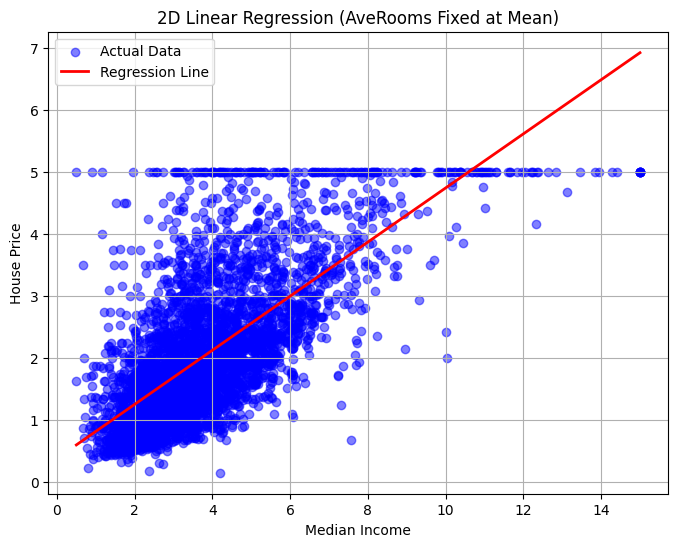

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Fix AveRooms at its mean
x_medinc = np.linspace(X_test['MedInc'].min(), X_test['MedInc'].max(), 100)
x_averooms_mean = np.full_like(x_medinc, X_test['AveRooms'].mean())

# Predict
y_pred_line = model.predict(np.c_[x_medinc, x_averooms_mean])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test['MedInc'], y_test, color='blue', alpha=0.5, label='Actual Data')
plt.plot(x_medinc, y_pred_line, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('2D Linear Regression (AveRooms Fixed at Mean)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\range\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


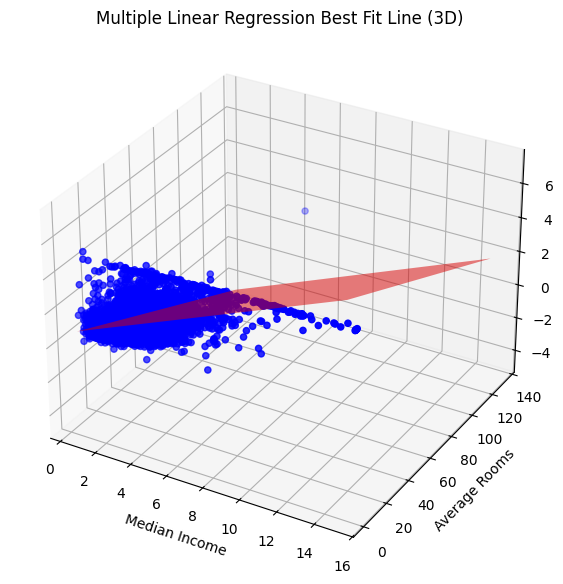

In [18]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['MedInc'], X_test['AveRooms'],
           y_test, color='blue', label='Actual Data')

x1_range = np.linspace(X_test['MedInc'].min(), X_test['MedInc'].max(), 100)
x2_range = np.linspace(X_test['AveRooms'].min(), X_test['AveRooms'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

z = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

ax.plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Median Income')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('House Price')
ax.set_title('Multiple Linear Regression Best Fit Line (3D)')

plt.show()

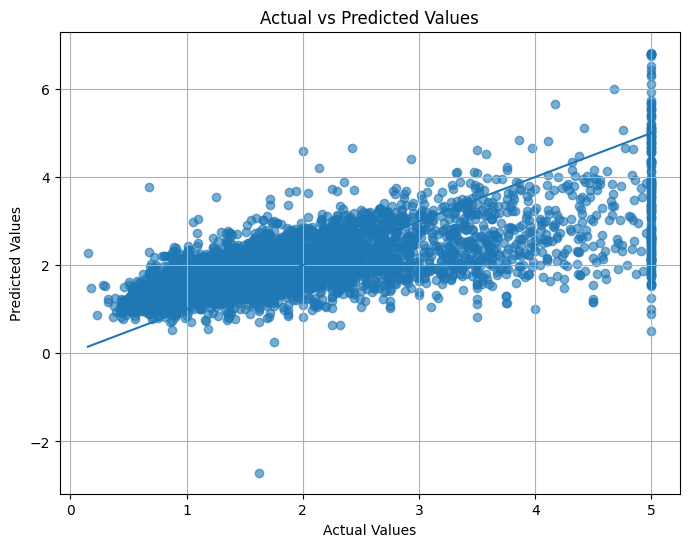

In [19]:
import matplotlib.pyplot as plt

# Predict values
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()


# The End !! 